# Stock Prediction

In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
msft = pd.read_csv("msft.csv")

In [95]:
msft.head()

,Date,Open,High,Low,Close,Volume
0,7/21/2014,83.46,83.53,81.81,81.93,2359300
1,7/18/2014,83.30,83.40,82.52,83.35,4020800
2,7/17/2014,84.35,84.63,83.33,83.63,1974000
3,7/16/2014,83.77,84.91,83.66,84.91,1755600
4,7/15/2014,84.30,84.38,83.20,83.58,1874700


In [96]:
msft.tail()

,Date,Open,High,Low,Close,Volume
3762,1/7/2000,48.55,50.35,47.80,50.00,4621200
3763,1/6/2000,46.78,48.35,46.28,48.03,3306100
3764,1/5/2000,46.94,47.50,45.92,46.75,4809900
3765,1/4/2000,49.80,49.80,47.72,47.85,4489500
3766,1/3/2000,52.70,53.20,49.60,49.75,3137300


In [97]:
msft.describe()

,Open,High,Low,Close,Volume
count,3767.000000,3767.000000,3767.000000,3767.000000,3.767000e+03
mean,55.208174,55.811001,54.562599,55.226161,4.936915e+06
std,17.707358,17.780680,17.669009,17.722486,3.174734e+06
min,20.690000,20.870000,17.850000,19.950000,0.000000e+00
25%,42.405000,42.890000,41.850000,42.415000,3.066700e+06
50%,49.990000,50.600000,49.310000,49.970000,4.482900e+06
75%,65.995000,66.785000,65.405000,65.965000,6.072700e+06
max,105.000000,105.740000,103.610000,104.820000,5.086050e+07


# Sorting the data

**Checking for Null values**

In [98]:
msft.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [99]:
msft['Date'] = msft['Date'].astype('datetime64')

In [100]:
msft.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [101]:
NAN = [(c, msft[c].isnull().mean()*100) for c in msft] 
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Volume,0.0


In [102]:
srt = msft.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Volume
3766,2000-01-03,52.70,53.20,49.60,49.75,3137300
3765,2000-01-04,49.80,49.80,47.72,47.85,4489500
3764,2000-01-05,46.94,47.50,45.92,46.75,4809900
3763,2000-01-06,46.78,48.35,46.28,48.03,3306100
3762,2000-01-07,48.55,50.35,47.80,50.00,4621200


In [103]:
srt.reset_index(inplace=True)

In [104]:
srt.head()

,index,Date,Open,High,Low,Close,Volume
0,3766,2000-01-03,52.70,53.20,49.60,49.75,3137300
1,3765,2000-01-04,49.80,49.80,47.72,47.85,4489500
2,3764,2000-01-05,46.94,47.50,45.92,46.75,4809900
3,3763,2000-01-06,46.78,48.35,46.28,48.03,3306100
4,3762,2000-01-07,48.55,50.35,47.80,50.00,4621200


# Data Visualization

**Plotting the graph for the Date and Close**

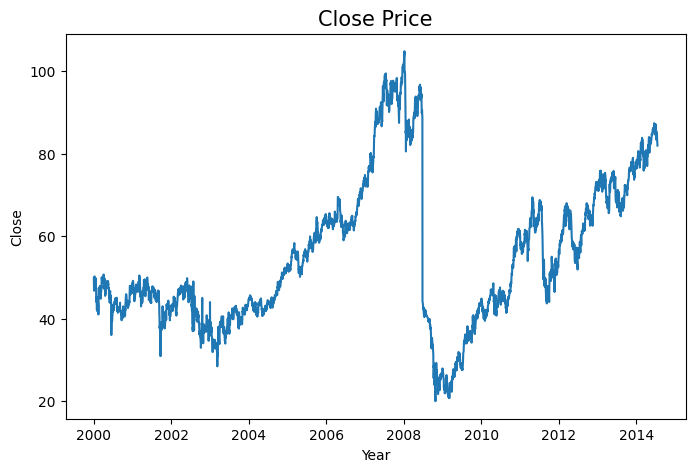

In [105]:
plt.figure(figsize=(8,5))
plt.plot(srt['Date'],srt['Close'])
plt.xlabel('Year', size=10)
plt.ylabel('Close', size=10)
plt.title('Close Price', size = 15)
plt.show()

In [106]:
close_srt = srt['Close']
close_srt

0       49.75
1       47.85
2       46.75
3       48.03
4       50.00
        ...  
3762    83.58
3763    84.91
3764    83.63
3765    83.35
3766    81.93
Name: Close, Length: 3767, dtype: float64

# Feature Scaling(MinMax Scaler)

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1, 1))
close_srt

array([[0.35112525],
       [0.32873807],
       [0.31577707],
       ...,
       [0.75032402],
       [0.74702486],
       [0.73029339]])

Since LSTM is sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 & 1

# Splitting the Dataset

In [179]:
train_size = int(len(close_srt)*0.75)
test_size = len(close_srt)-train_size
train_data, test_data = close_srt[0:train_size, :], close_srt[train_size:len(close_srt), :1]

In [180]:
train_data.shape

(2825, 1)

In [181]:
test_data.shape

(942, 1)

# Convert an array of value into dataset matrix

In [182]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Reshaping of dataset

In [183]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [184]:
print(X_train.shape), print(y_train.shape)

(2724, 100)
(2724,)


(None, None)

In [185]:
print(X_test.shape), print(y_test.shape)

(841, 100)
(841,)


(None, None)

In [186]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [187]:
X_train

array([[[0.35112525],
        [0.32873807],
        [0.31577707],
        ...,
        [0.33286202],
        [0.33580771],
        [0.32461412]],

       [[0.32873807],
        [0.31577707],
        [0.33085896],
        ...,
        [0.33580771],
        [0.32461412],
        [0.32084364]],

       [[0.31577707],
        [0.33085896],
        [0.35407093],
        ...,
        [0.32461412],
        [0.32084364],
        [0.32402498]],

       ...,

       [[0.30729351],
        [0.31283139],
        [0.31118181],
        ...,
        [0.46223636],
        [0.45257453],
        [0.42818428]],

       [[0.31283139],
        [0.31118181],
        [0.30540827],
        ...,
        [0.45257453],
        [0.42818428],
        [0.44244138]],

       [[0.31118181],
        [0.30540827],
        [0.29468599],
        ...,
        [0.42818428],
        [0.44244138],
        [0.46317898]]])

In [188]:
y_train

array([0.32084364, 0.32402498, 0.32013668, ..., 0.44244138, 0.46317898,
       0.47130906])

In [189]:
X_test

array([[[0.47213385],
        [0.48544833],
        [0.48344527],
        ...,
        [0.54966419],
        [0.56415695],
        [0.57275834]],

       [[0.48544833],
        [0.48344527],
        [0.47649346],
        ...,
        [0.56415695],
        [0.57275834],
        [0.58265583]],

       [[0.48344527],
        [0.47649346],
        [0.47778956],
        ...,
        [0.57275834],
        [0.58265583],
        [0.5734653 ]],

       ...,

       [[0.75244492],
        [0.73111818],
        [0.74784965],
        ...,
        [0.74702486],
        [0.75939672],
        [0.74973489]],

       [[0.73111818],
        [0.74784965],
        [0.70719925],
        ...,
        [0.75939672],
        [0.74973489],
        [0.76540591]],

       [[0.74784965],
        [0.70719925],
        [0.7333569 ],
        ...,
        [0.74973489],
        [0.76540591],
        [0.75032402]]])

In [190]:
y_test

array([0.58265583, 0.5734653 , 0.5734653 , 0.54954637, 0.54259456,
       0.57099093, 0.53835277, 0.54612937, 0.52928008, 0.52067869,
       0.51973607, 0.52362437, 0.50017674, 0.50818899, 0.51408036,
       0.50324025, 0.48639095, 0.49181101, 0.48568399, 0.48167786,
       0.48721574, 0.49452103, 0.52209261, 0.51207729, 0.48910098,
       0.5004124 , 0.5055968 , 0.50253329, 0.4982915 , 0.5190291 ,
       0.50901379, 0.50948509, 0.52527395, 0.50842465, 0.50547897,
       0.51066337, 0.50488983, 0.53316838, 0.53399317, 0.5242135 ,
       0.52244609, 0.51525863, 0.52751267, 0.5462472 , 0.56109344,
       0.56427477, 0.56262519, 0.56380346, 0.57146224, 0.57499705,
       0.57051962, 0.55378815, 0.55437728, 0.56887004, 0.57205137,
       0.56509956, 0.55944386, 0.55437728, 0.5449511 , 0.55154943,
       0.54931071, 0.55838341, 0.5514316 , 0.54094497, 0.50830682,
       0.50983858, 0.4861553 , 0.47366561, 0.45434193, 0.43219041,
       0.40108401, 0.36573583, 0.37893248, 0.34853305, 0.38034

# Creating the stacked LSTM Model

In [191]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [192]:
#Creating LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(100, 1), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [193]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Prediction and Checking performance

In [194]:
model.fit(X_train, y_train, validation_split = 0.1, epochs = 60, batch_size = 64, verbose = 1)

Epoch 1/60
39/39 [==============================] - 22s 310ms/step - loss: 0.0223 - val_loss: 6.2357e-04
Epoch 2/60
39/39 [==============================] - 10s 254ms/step - loss: 0.0022 - val_loss: 5.7172e-04
Epoch 3/60
39/39 [==============================] - 15s 385ms/step - loss: 0.0020 - val_loss: 7.1689e-04
Epoch 4/60
39/39 [==============================] - 9s 237ms/step - loss: 0.0018 - val_loss: 7.5942e-04
Epoch 5/60
39/39 [==============================] - 9s 228ms/step - loss: 0.0017 - val_loss: 8.5362e-04
Epoch 6/60
39/39 [==============================] - 9s 227ms/step - loss: 0.0017 - val_loss: 8.3710e-04
Epoch 7/60
39/39 [==============================] - 11s 289ms/step - loss: 0.0014 - val_loss: 4.8476e-04
Epoch 8/60
39/39 [==============================] - 11s 289ms/step - loss: 0.0013 - val_loss: 3.4529e-04
Epoch 9/60
39/39 [==============================] - 10s 243ms/step - loss: 0.0012 - val_loss: 3.3181e-04
Epoch 10/60
39/39 [==============================] - 10s 2

In [195]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

27/27 [==============================] - 2s 78ms/step


In [196]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculating the Performance

In [197]:
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [198]:
math.sqrt(mean_squared_error(y_train, train_predict))

54.62012879014956

In [199]:
math.sqrt(mean_squared_error(y_test, test_predict))

67.78943825987373

**Plotting the graph with predicted train data, test data with actual data**

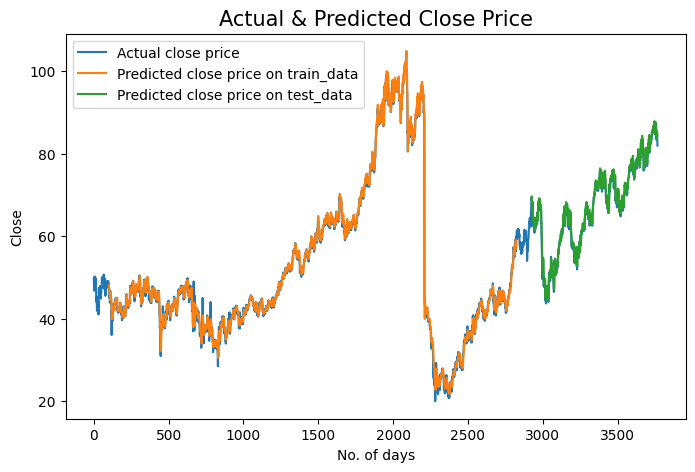

In [200]:
look_back = 100

#shift train predictions for plotting 
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting 
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict
#plot baseline ans predictions
plt.subplots(figsize=(8, 5))
plt.plot(scaler.inverse_transform(close_srt), label='Actual close price')
plt.plot(trainPredictPlot, label ='Predicted close price on train_data')
plt.plot(testPredictPlot, label = 'Predicted close price on test_data')
plt.xlabel('No. of days', size = 10)
plt.ylabel('Close', size = 10)
plt.title('Actual & Predicted Close Price', size = 15)
plt.legend()
plt.show()

In [201]:
len(test_data)

942

In [203]:
pred_input = test_data[842:].reshape(1, -1)
pred_input.shape

(1, 100)

In [204]:
temp_input = list(pred_input)
temp_input = temp_input[0].tolist()

In [205]:
temp_input

[0.7333568987863792,
 0.7213385177330035,
 0.7211028632025452,
 0.7039000824790858,
 0.6997761281960647,
 0.7043713915400025,
 0.6863438199599389,
 0.6587722398963121,
 0.6712619300106045,
 0.6818663838812301,
 0.6819842111464594,
 0.6862259926947096,
 0.6779780841286674,
 0.6839872746553554,
 0.6663131848709792,
 0.6822198656769176,
 0.6932956286084602,
 0.6981265464828562,
 0.7123836455755862,
 0.7155649817367741,
 0.7160362907976907,
 0.7119123365146697,
 0.7079062094968777,
 0.7166254271238365,
 0.6944739012607518,
 0.6987156828090021,
 0.693884764934606,
 0.6994226464003772,
 0.6795098385766468,
 0.6864616472251679,
 0.6719688936019796,
 0.6848120655119595,
 0.700011782726523,
 0.700011782726523,
 0.700011782726523,
 0.7265229174030872,
 0.7248733356898788,
 0.7319429716036291,
 0.7216919995286911,
 0.7245198538941912,
 0.7406621892305881,
 0.7479674796747969,
 0.7479674796747969,
 0.754801461058089,
 0.7226346176505244,
 0.7100271002710027,
 0.7221633085896076,
 0.735713444090962

In [206]:
lst_output = [] #Predicted 30 days output
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        pred_input = np.array(temp_input[1:]) #for last 100 data
        print("{} day input {}".format(i, pred_input))
        pred_input = pred_input.reshape(1, -1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(pred_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps, 1))
        yhat = model.predict(pred_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.73512614]
101
1 day input [0.72133852 0.72110286 0.70390008 0.69977613 0.70437139 0.68634382
 0.65877224 0.67126193 0.68186638 0.68198421 0.68622599 0.67797808
 0.68398727 0.66631318 0.68221987 0.69329563 0.69812655 0.71238365
 0.71556498 0.71603629 0.71191234 0.70790621 0.71662543 0.6944739
 0.69871568 0.69388476 0.69942265 0.67950984 0.68646165 0.67196889
 0.68481207 0.70001178 0.70001178 0.70001178 0.72652292 0.72487334
 0.73194297 0.721692   0.72451985 0.74066219 0.74796748 0.74796748
 0.75480146 0.72263462 0.7100271  0.72216331 0.73571344 0.73618475
 0.74879227 0.74867444 0.75103099 0.74490397 0.73500648 0.74030871
 0.73618475 0.74254743 0.74290091 0.74384353 0.75197361 0.75986803
 0.76422764 0.76328502 0.76022152 0.760575   0.76481678 0.76752681
 0.77153293 0.77659951 0.77942736 0.77671733 0.7748321  0.78060563
 0.77235772 0.76846942 0.77954519 0.77848474 0.7903853  0.79427359
 0.78743961 0.7843761  0.77848474 0.76646636 0.76222458 0.76681984
 0.77070814 0.77636385 0.7916814  

**Plotting last 130 days Closing Price**

In [207]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [208]:
len(close_srt)

3767

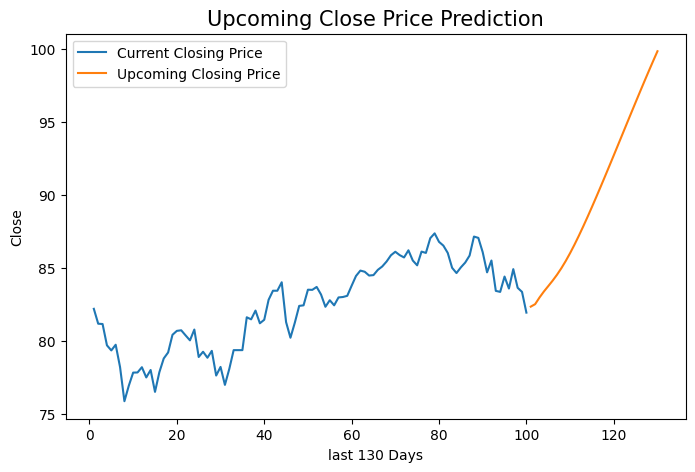

In [209]:
plt.figure(figsize = (8, 5))
plt.plot(day_new, scaler.inverse_transform(close_srt[3667:]), label='Current Closing Price')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Upcoming Closing Price')
plt.xlabel('last 130 Days', size = 10)
plt.ylabel('Close', size=10)
plt.title('Upcoming Close Price Prediction', size=15)
plt.legend()
plt.show()

**Appending in a list is done to make continuous graph**

In [210]:
df3 = close_srt.tolist()
#adding specified list of predicted 30 days output to the end of 100 days 
df3.extend(lst_output)

In [211]:
print(len(df3))

3797


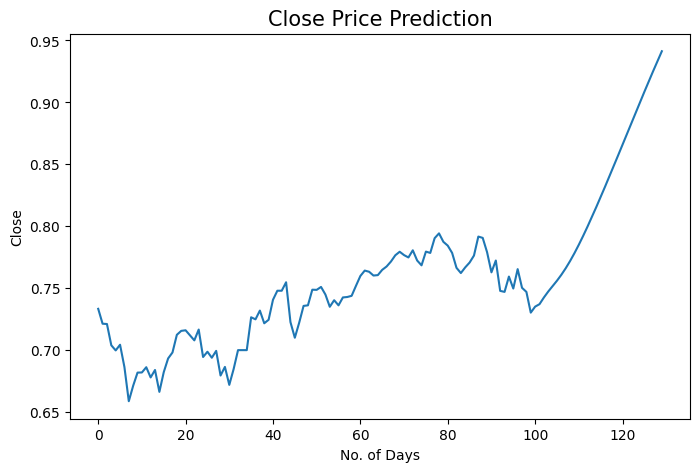

In [212]:
plt.figure(figsize = (8, 5))
plt.plot(df3[3667:]) #latest 100 days output
plt.xlabel('No. of Days', size = 10)
plt.ylabel('Close', size=10)
plt.title('Close Price Prediction', size=15)
plt.show()

**Plotting the Graph with predicted 30 days output**

In [213]:
df3 = scaler.inverse_transform(df3).tolist() #updoing scaling of df3

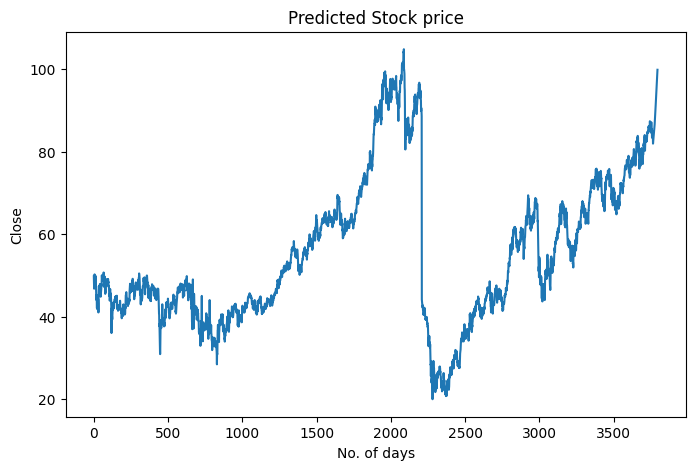

In [214]:
plt.figure(figsize = (8, 5))
plt.plot( df3)
plt.xlabel('No. of days')
plt.ylabel('Close')
plt.title('Predicted Stock price')
plt.show()